In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
#from plotcm import plot_confusion_matrix

import pdb

torch.set_printoptions(linewidth=120)
import torchvision
import torchvision.transforms as transforms

In [5]:
train_set = torchvision.datasets.FashionMNIST(
    root='./data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

100%|██████████| 26421880/26421880 [00:05<00:00, 4641320.41it/s] 


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 329789.90it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 4887778.95it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 20583676.83it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [6]:
train_loader = torch.utils.data.DataLoader(train_set
    ,batch_size=1000
    ,shuffle=True
)

In [8]:
len(train_set)

60000

In [9]:
sample = next(iter(train_set))

In [15]:
sample[0].shape

torch.Size([1, 28, 28])

In [18]:
image, label = sample

In [19]:
type(image)

torch.Tensor

In [20]:
type(label)

int

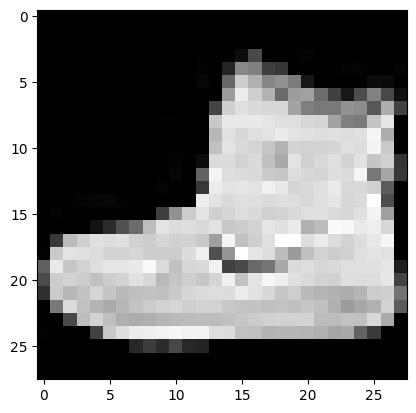

In [21]:
plt.imshow(image.squeeze(), cmap="gray")

In [53]:
display_loader = torch.utils.data.DataLoader(
    train_set, batch_size=10)

In [54]:
batch = next(iter(display_loader))

In [55]:
images, labels = batch

In [56]:
grid = torchvision.utils.make_grid(images, nrow=10)

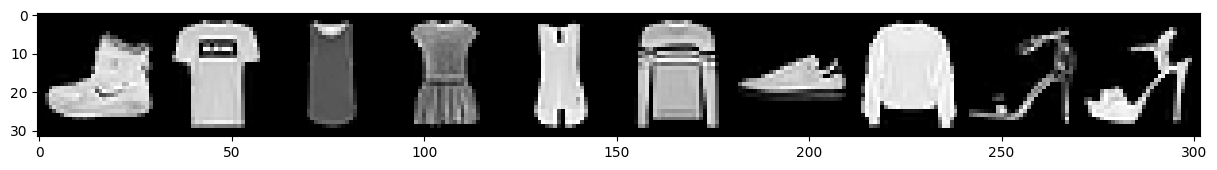

In [57]:
plt.figure(figsize=(15,15))
plt.imshow(grid.permute(1,2,0))

In [58]:
print('labels:', labels)

labels: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


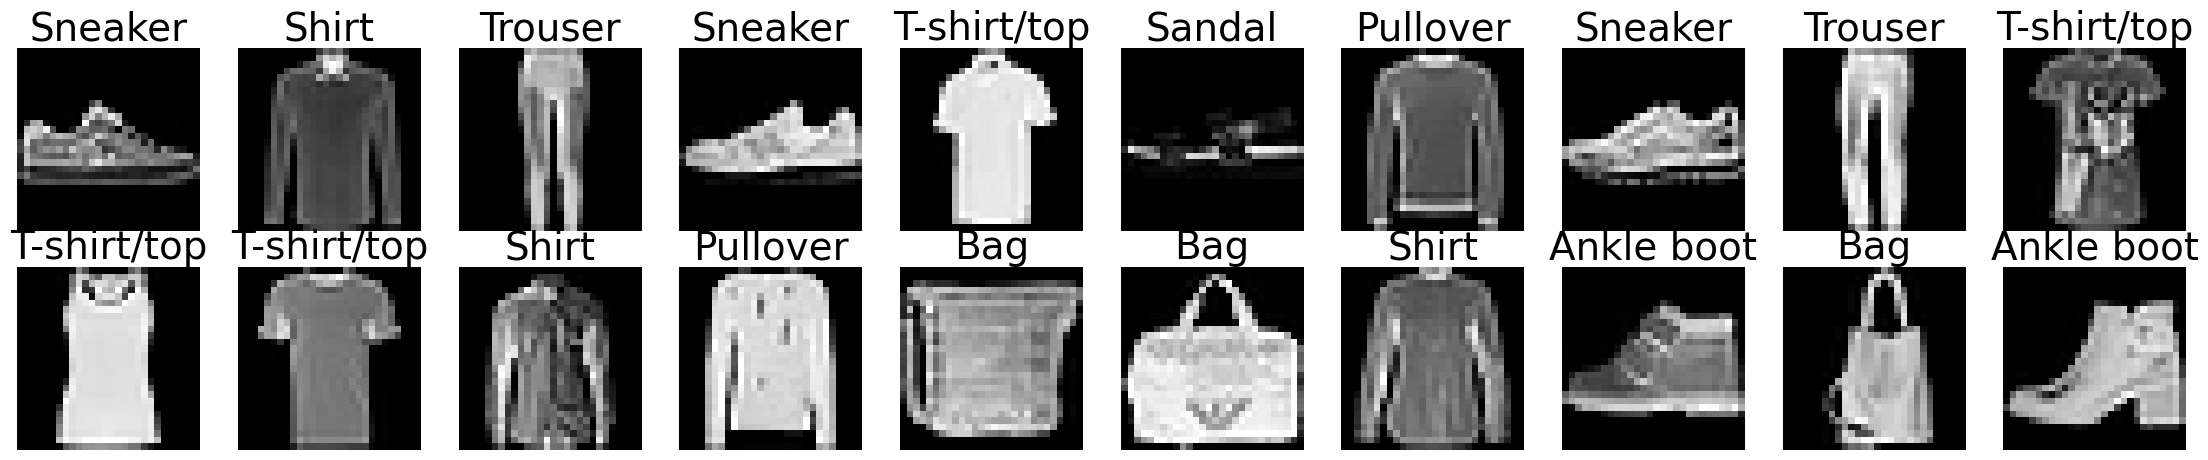

In [62]:
how_many_to_plot = 20

train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=1, shuffle=True
)

plt.figure(figsize=(28,28))
for i, batch in enumerate(train_loader, start=1):
    image, label = batch
    plt.subplot(10,10,i)
    plt.imshow(image.reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.title(train_set.classes[label.item()], fontsize=28)
    if (i >= how_many_to_plot): break
plt.show()

In [63]:
import torch.nn as nn

In [64]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)

        self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)

    def forward(self, t):
        # (1) input layer
        t = t

        # (2) hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # (3) hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # (4) hidden linear layer
        t = t.reshape(-1, 12 * 4 * 4)
        t = self.fc1(t)
        t = F.relu(t)

        # (5) hidden linear layer
        t = self.fc2(t)
        t = F.relu(t)

        # (6) output layer
        t = self.out(t)
        #t = F.softmax(t, dim=1)

        return t

In [65]:
torch.set_grad_enabled(False)  # turn off graph

In [66]:
network = Network()

In [67]:
sample = next(iter(train_set)) 
image, label = sample 
image.shape 

torch.Size([1, 28, 28])

In [68]:
pred = network(image.unsqueeze(0))

In [71]:
pred

tensor([[ 0.0202, -0.0447,  0.0722, -0.0820,  0.1050,  0.0963,  0.0794,  0.0779,  0.0092,  0.0511]])

In [72]:
pred.argmax(dim=1)

tensor([4])

In [73]:
F.softmax(pred, dim=1)

tensor([[0.0980, 0.0919, 0.1033, 0.0885, 0.1067, 0.1058, 0.1040, 0.1038, 0.0969, 0.1011]])

In [74]:
F.softmax(pred, dim=1).sum()

tensor(1.0000)